In [1]:
import pandas as pd
import numpy as np
import dateutil
import calendar

# package to extract data from various Internet sources into a DataFrame
# make sure you have it installed
from pandas_datareader import data, wb

# package for dates
import datetime as dt

In [2]:
A_vendor_weigh = pd.read_csv('Amazon_5weeks.csv')

In [3]:
#데이터 타임으로 변경
A_vendor_weigh['Date'] = pd.to_datetime(A_vendor_weigh.loc[:,'Date'])
A_vendor_weigh

,Unnamed: 0,Vendor,Product_name,Date,Week,Year,Point,Vote,Title,Review
0,0,Realme,Realme 3 Pro,2019-07-24,30,19,1.0,10,Very bad techinal support and not satisfied wi...,Night mode camera very bad quality. Front came...
1,1,Realme,Realme 3 Pro,2019-07-26,30,19,1.0,1,Battery backup\n,Battery backup is not sufficient.. please not ...
2,2,Realme,Realme 3 Pro,2019-07-28,30,19,1.0,2,Not satisfied\n,The mobile which i received is not good. The s...
3,3,OPPO,OPPO A7,2019-07-25,30,19,1.0,0,Policy not good\n,Phone purchase 6 month EMI with but all amount...
4,4,OPPO,OPPO A7,2019-07-22,30,19,1.0,0,Shortage of accessories\n,Sim ejector tool is missing....
5,5,OPPO,OPPO A7,2019-07-28,30,19,1.0,0,Missing part\n,Very hard missing part
6,6,OPPO,OPPO A7,2019-07-22,30,19,2.0,0,Hi\n,Hi
7,7,Realme,Realme 3 Pro,2019-07-27,30,19,4.0,7,Best phone under 15k\n,Excellent camera.Outstanding gaming and other ...
8,8,Realme,Realme 3 Pro,2019-07-27,30,19,4.0,5,Good phone\n,Very good phone at this price. All features OK.
9,9,Realme,Realme 3 Pro,2019-07-28,30,19,4.0,2,Worth it\n,Good phone in this range.. realme is really good


In [4]:
#두 컬럼만 불러오기
A_vendor_weigh = A_vendor_weigh[['Date', 'Vendor']]
A_vendor_weigh.head()

,Date,Vendor
0,2019-07-24,Realme
1,2019-07-26,Realme
2,2019-07-28,Realme
3,2019-07-25,OPPO
4,2019-07-22,OPPO


In [5]:
# 내림차순으로 정렬
A_vendor_weigh = A_vendor_weigh.sort_values(['Date'], ascending=[False])

In [6]:
# 데이트 뉴, 앞으로 설정
A_vendor_weigh = A_vendor_weigh.set_index('Date')

In [7]:
#주차별로 멀티 인덱스 만들기
A_vendor_weigh1 = A_vendor_weigh.groupby(['Vendor','Date']).resample('w').count().unstack()
A_vendor_weigh1.head()

Vendor                                            
Date              2019-07-28 2019-08-04 2019-08-11 2019-08-18 2019-08-25
Vendor Date                                                             
Huawei 2019-07-22       67.0        NaN        NaN        NaN        NaN
       2019-07-23       52.0        NaN        NaN        NaN        NaN
       2019-07-24       65.0        NaN        NaN        NaN        NaN
       2019-07-25       54.0        NaN        NaN        NaN        NaN
       2019-07-26       45.0        NaN        NaN        NaN        NaN

In [8]:
#결측값 = 0 처리
A_vendor_weigh1 = A_vendor_weigh1.fillna(0)

In [9]:
#데이트 뉴 행으로 합치기 
A_vendor_weigh2 = A_vendor_weigh1.sum(axis=1, level = 'Date')
A_vendor_weigh2

Date               2019-07-28  2019-08-04  2019-08-11  2019-08-18  2019-08-25
Vendor Date                                                                  
Huawei 2019-07-22        67.0         0.0         0.0         0.0         0.0
       2019-07-23        52.0         0.0         0.0         0.0         0.0
       2019-07-24        65.0         0.0         0.0         0.0         0.0
       2019-07-25        54.0         0.0         0.0         0.0         0.0
       2019-07-26        45.0         0.0         0.0         0.0         0.0
       2019-07-27        48.0         0.0         0.0         0.0         0.0
       2019-07-28        46.0         0.0         0.0         0.0         0.0
       2019-07-29         0.0        51.0         0.0         0.0         0.0
       2019-07-30         0.0        40.0         0.0         0.0         0.0
       2019-07-31         0.0        58.0         0.0         0.0         0.0
       2019-08-01         0.0        74.0         0.0         0.0         0.0
       2019-08-02         0.0        49.0         0.0         0.0         0.0
       2019-08-03         0.0        45.0         0.0         0.0         0.0
       2019-08-04         0.0        38.0         0.0         0.0         0.0
       2019-08-05         0.0         0.0        42.0         0.0         0.0
       2019-08-06         0.0         0.0        29.0         0.0         0.0
       2019-08-07         0.0         0.0        18.0         0.0         0.0
       2019-08-08         0.0         0.0        16.0         0.0         0.0
       2019-08-09         0.0         0.0        18.0         0.0         0.0
       2019-08-10         0.0         0.0         8.0         0.0         0.0
       2019-08-11         0.0         0.0        20.0         0.0         0.0
       2019-08-12         0.0         0.0         0.0       107.0         0.0
       2019-08-13         0.0         0.0         0.0        99.0         0.0
       2019-08-14         0.0         0.0         0.0        75.0         0.0
       2019-08-15         0.0         0.0         0.0        34.0         0.0
       2019-08-16         0.0         0.0         0.0        40.0         0.0
       2019-08-17         0.0         0.0         0.0        25.0         0.0
       2019-08-18         0.0         0.0         0.0        20.0         0.0
       2019-08-19         0.0         0.0         0.0         0.0        46.0
       2019-08-20         0.0         0.0         0.0         0.0        53.0
...                       ...         ...         ...         ...         ...
Xiaomi 2019-07-27       506.0         0.0         0.0         0.0         0.0
       2019-07-28       463.0         0.0         0.0         0.0         0.0
       2019-07-29         0.0       551.0         0.0         0.0         0.0
       2019-07-30         0.0       488.0         0.0         0.0         0.0
       2019-07-31         0.0       512.0         0.0         0.0         0.0
       2019-08-01         0.0       455.0         0.0         0.0         0.0
       2019-08-02         0.0       489.0         0.0         0.0         0.0
       2019-08-03         0.0       467.0         0.0         0.0         0.0
       2019-08-04         0.0       356.0         0.0         0.0         0.0
       2019-08-05         0.0         0.0       309.0         0.0         0.0
       2019-08-06         0.0         0.0       303.0         0.0         0.0
       2019-08-07         0.0         0.0       139.0         0.0         0.0
       2019-08-08         0.0         0.0       102.0         0.0         0.0
       2019-08-09         0.0         0.0       126.0         0.0         0.0
       2019-08-10         0.0         0.0       122.0         0.0         0.0
       2019-08-11         0.0         0.0       165.0         0.0         0.0
       2019-08-12         0.0         0.0         0.0       647.0         0.0
       2019-08-13         0.0         0.0         0.0       550.0         0.0
       2019-08-14     

In [10]:
#주+벤더별 정렬하기
A_vendor_weigh3 = A_vendor_weigh2.sum(axis=0, level = 'Vendor')
A_vendor_weigh3

Date,2019-07-28 00:00:00,2019-08-04 00:00:00,2019-08-11 00:00:00,2019-08-18 00:00:00,2019-08-25 00:00:00
Vendor,,,,,
Huawei,377.0,355.0,151.0,400.0,441.0
OPPO,1316.0,1430.0,834.0,1286.0,2745.0
Others,248.0,280.0,173.0,322.0,509.0
Realme,392.0,382.0,207.0,378.0,710.0
Samsung,4850.0,3436.0,1109.0,1496.0,7422.0
Vivo,461.0,444.0,183.0,473.0,562.0
Xiaomi,3539.0,3318.0,1266.0,2251.0,4242.0


In [11]:
# # 불필요한 칼럼 삭제
# A_vendor_weigh3 = A_vendor_weigh3.drop(A_vendor_weigh3.columns[:4], axis='columns')
# A_vendor_weigh3

In [12]:
# 칼럼명 변경
A_vendor_weigh3.columns = ["Week30", "Week31", "Week32", "Week33", "Week34"]
A_vendor_weigh3

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Huawei,377.0,355.0,151.0,400.0,441.0
OPPO,1316.0,1430.0,834.0,1286.0,2745.0
Others,248.0,280.0,173.0,322.0,509.0
Realme,392.0,382.0,207.0,378.0,710.0
Samsung,4850.0,3436.0,1109.0,1496.0,7422.0
Vivo,461.0,444.0,183.0,473.0,562.0
Xiaomi,3539.0,3318.0,1266.0,2251.0,4242.0


In [13]:
#가중치 더해서 weight_sum하기
A_vendor_weigh3["Week34"] = A_vendor_weigh3["Week34"] * (0.95)
A_vendor_weigh3["Week33"] = A_vendor_weigh3["Week33"] * (0.90)
A_vendor_weigh3["Week32"] = A_vendor_weigh3["Week32"] * (0.85)
A_vendor_weigh3["Week31"] = A_vendor_weigh3["Week31"] * (0.80)
A_vendor_weigh3["Week30"] = A_vendor_weigh3["Week30"] * (0.75)

A_vendor_weigh3

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Huawei,282.75,284.0,128.35,360.0,418.95
OPPO,987.00,1144.0,708.90,1157.4,2607.75
Others,186.00,224.0,147.05,289.8,483.55
Realme,294.00,305.6,175.95,340.2,674.50
Samsung,3637.50,2748.8,942.65,1346.4,7050.90
Vivo,345.75,355.2,155.55,425.7,533.90
Xiaomi,2654.25,2654.4,1076.10,2025.9,4029.90


In [14]:
#칼럼명으로 오름차순 정렬

A_vendor_weigh3 = A_vendor_weigh3.sort_index(axis =1 , ascending = True)

In [15]:
####################################################
#####주차별 가중치합 (기존의 Weight_sum과 달리, 2~4주차치만 뽑은 데이터!)

A_vendor_weigh3['Weight_sum'] = A_vendor_weigh3['Week34'] + A_vendor_weigh3['Week33'] + A_vendor_weigh3['Week32'] + A_vendor_weigh3['Week31'] + A_vendor_weigh3['Week30']
A_vendor_weigh3

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Vendor,,,,,,
Huawei,282.75,284.0,128.35,360.0,418.95,1474.05
OPPO,987.00,1144.0,708.90,1157.4,2607.75,6605.05
Others,186.00,224.0,147.05,289.8,483.55,1330.40
Realme,294.00,305.6,175.95,340.2,674.50,1790.25
Samsung,3637.50,2748.8,942.65,1346.4,7050.90,15726.25
Vivo,345.75,355.2,155.55,425.7,533.90,1816.10
Xiaomi,2654.25,2654.4,1076.10,2025.9,4029.90,12440.55


In [16]:
#내림차순으로 정렬
A_vendor_weigh3 = A_vendor_weigh3.sort_values(["Weight_sum"], ascending=[False])
A_vendor_weigh3

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Vendor,,,,,,
Samsung,3637.50,2748.8,942.65,1346.4,7050.90,15726.25
Xiaomi,2654.25,2654.4,1076.10,2025.9,4029.90,12440.55
OPPO,987.00,1144.0,708.90,1157.4,2607.75,6605.05
Vivo,345.75,355.2,155.55,425.7,533.90,1816.10
Realme,294.00,305.6,175.95,340.2,674.50,1790.25
Huawei,282.75,284.0,128.35,360.0,418.95,1474.05
Others,186.00,224.0,147.05,289.8,483.55,1330.40


In [17]:
#Weight_sum탈락시키기
A_vendor_weigh3_review_count = A_vendor_weigh3.drop(A_vendor_weigh3.columns[-1:], axis='columns')
A_vendor_weigh3_review_count

,Week30,Week31,Week32,Week33,Week34
Vendor,,,,,
Samsung,3637.50,2748.8,942.65,1346.4,7050.90
Xiaomi,2654.25,2654.4,1076.10,2025.9,4029.90
OPPO,987.00,1144.0,708.90,1157.4,2607.75
Vivo,345.75,355.2,155.55,425.7,533.90
Realme,294.00,305.6,175.95,340.2,674.50
Huawei,282.75,284.0,128.35,360.0,418.95
Others,186.00,224.0,147.05,289.8,483.55


In [18]:
# csv파일로 저장하기
data = pd.DataFrame(A_vendor_weigh3)
data.to_csv('Amazon_vendor_weight_sum.csv')

In [19]:
#파이차트 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rc

%matplotlib inline

In [20]:
#벤더 + weigh_sum만 불러오기
A_vendor_weigh4 = A_vendor_weigh3[['Weight_sum']]
A_vendor_weigh4

,Weight_sum
Vendor,
Samsung,15726.25
Xiaomi,12440.55
OPPO,6605.05
Vivo,1816.10
Realme,1790.25
Huawei,1474.05
Others,1330.40


C:\Users\LES\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


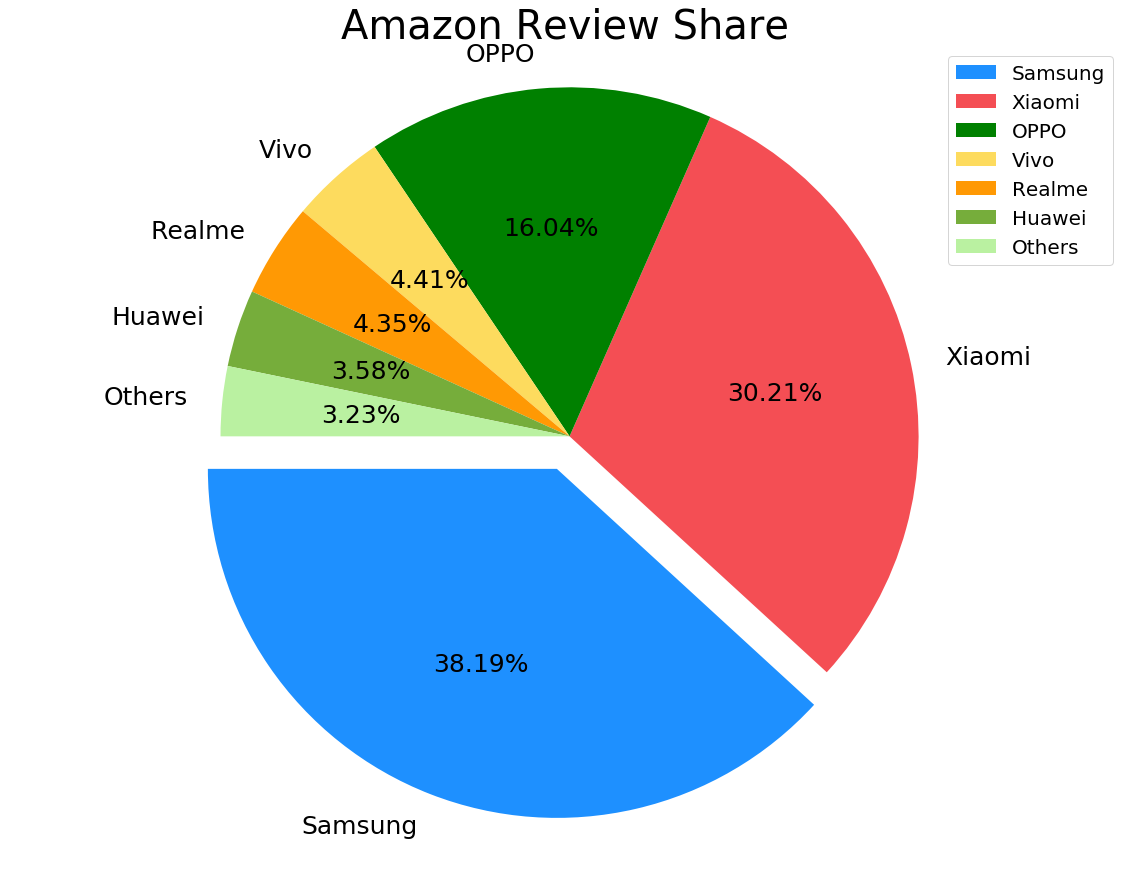

In [22]:
#파이차트 그리기
plt.pie(A_vendor_weigh4,
        explode = (0.1, 0 , 0, 0, 0, 0, 0),
        labels = ['Samsung', 'Xiaomi', 'OPPO', 'Vivo', 'Realme', 'Huawei','Others'],
        colors = ['dodgerblue','#F44E54', 'green' , '#FDDB5E' , '#FF9904', '#76AD3B','#BAF1A1'], 
        startangle = 180,
        autopct = '%1.2f%%')

plt.rcParams.update({'font.size': 25})
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis('equal', fontsize=18)
plt.title('Amazon Review Share', fontsize = 40)       
plt.legend(fontsize=20, loc='upper right')

plt.show()

In [23]:
#백분율 구하기 vendor_weigh_2
A_vendor_weigh3_per = (A_vendor_weigh3[0:20] / A_vendor_weigh3[0:20].sum()) * 100
A_vendor_weigh3_per

,Week30,Week31,Week32,Week33,Week34,Weight_sum
Vendor,,,,,,
Samsung,43.369400,35.624676,28.269182,22.646079,44.627503,38.186591
Xiaomi,31.646249,34.401244,32.271221,34.075083,25.506584,30.208231
OPPO,11.767862,14.826335,21.259240,19.467151,16.505321,16.038429
Vivo,4.122329,4.603421,4.664797,7.160157,3.379232,4.409867
Realme,3.505321,3.960601,5.276574,5.722071,4.269136,4.347098
Huawei,3.371188,3.680664,3.849095,6.055101,2.651675,3.579299
Others,2.217652,2.903059,4.409890,4.874357,3.060550,3.230487


In [24]:
# csv파일로 저장하기 (주별 리뷰 점유율 percentage)
data1 = pd.DataFrame(A_vendor_weigh3_per)
data1.to_csv('weekly_Amazon_vendor_weight_sum_percetage#.csv')

In [25]:
#행과 열을 바꾸기
A_vendor_weigh3_per = np.transpose(A_vendor_weigh3_per)
A_vendor_weigh3_per.head()

Vendor,Samsung,Xiaomi,OPPO,Vivo,Realme,Huawei,Others
Week30,43.369400,31.646249,11.767862,4.122329,3.505321,3.371188,2.217652
Week31,35.624676,34.401244,14.826335,4.603421,3.960601,3.680664,2.903059
Week32,28.269182,32.271221,21.259240,4.664797,5.276574,3.849095,4.409890
Week33,22.646079,34.075083,19.467151,7.160157,5.722071,6.055101,4.874357
Week34,44.627503,25.506584,16.505321,3.379232,4.269136,2.651675,3.060550


C:\Users\LES\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


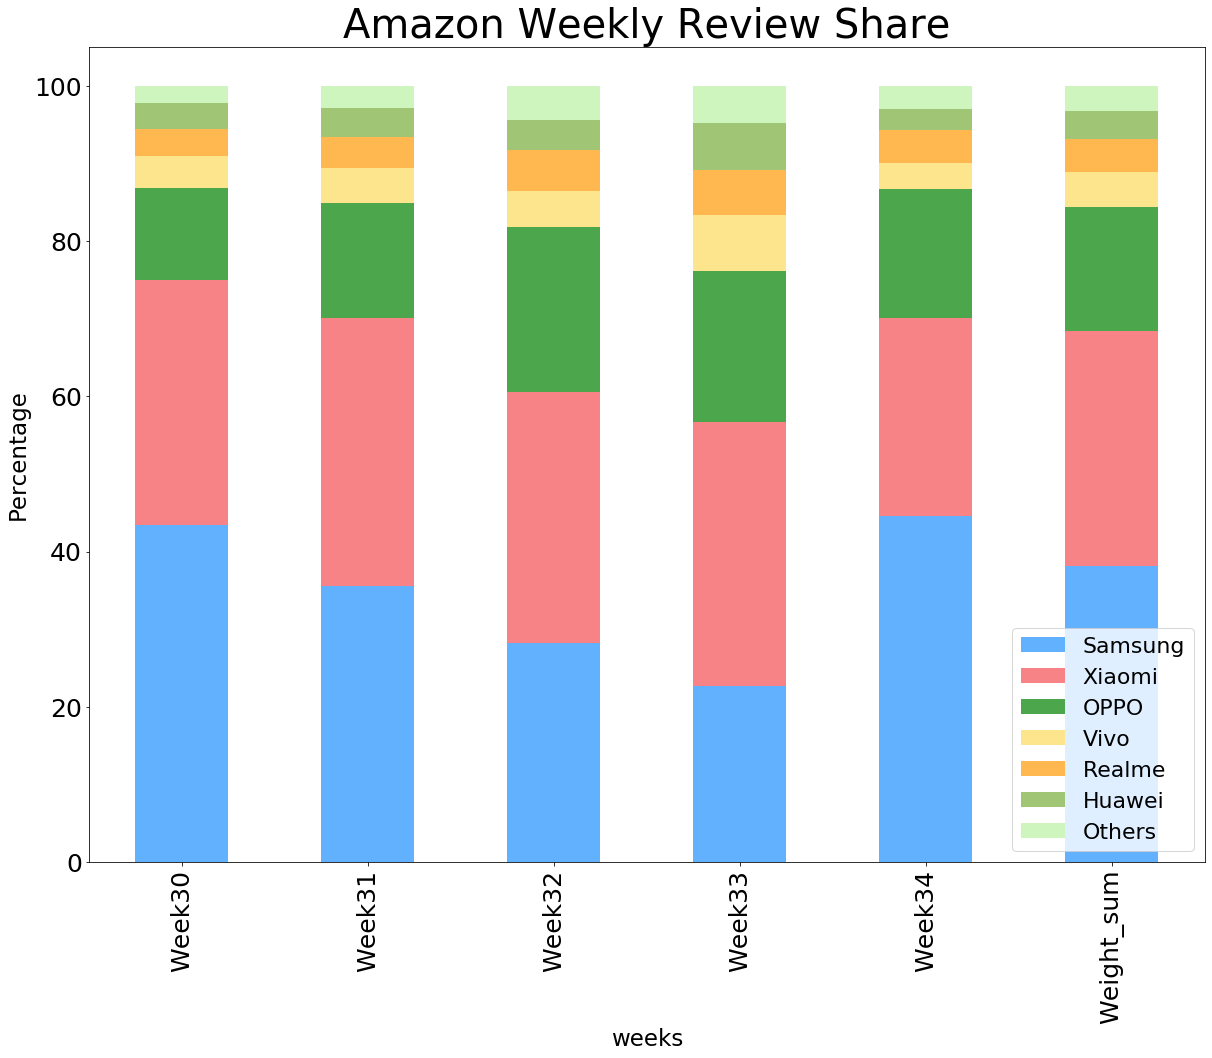

In [26]:
# 누적막대그래프 만들기
A_vendor_weigh3_per.plot.bar(stacked=True, fontsize=25,
                          colors = ['dodgerblue','#F44E54', 'green' , '#FDDB5E' , '#FF9904', '#76AD3B','#BAF1A1'] , alpha = 0.7)

# Set the title and labels
plt.rcParams['figure.figsize'] = [15, 13]
plt.legend(fontsize = 22, loc='lower right')
plt.xlabel('weeks', fontsize = 23)
plt.ylabel('Percentage', fontsize=23)
plt.title('Amazon Weekly Review Share', fontsize = 40)


# show the plot
plt.show()

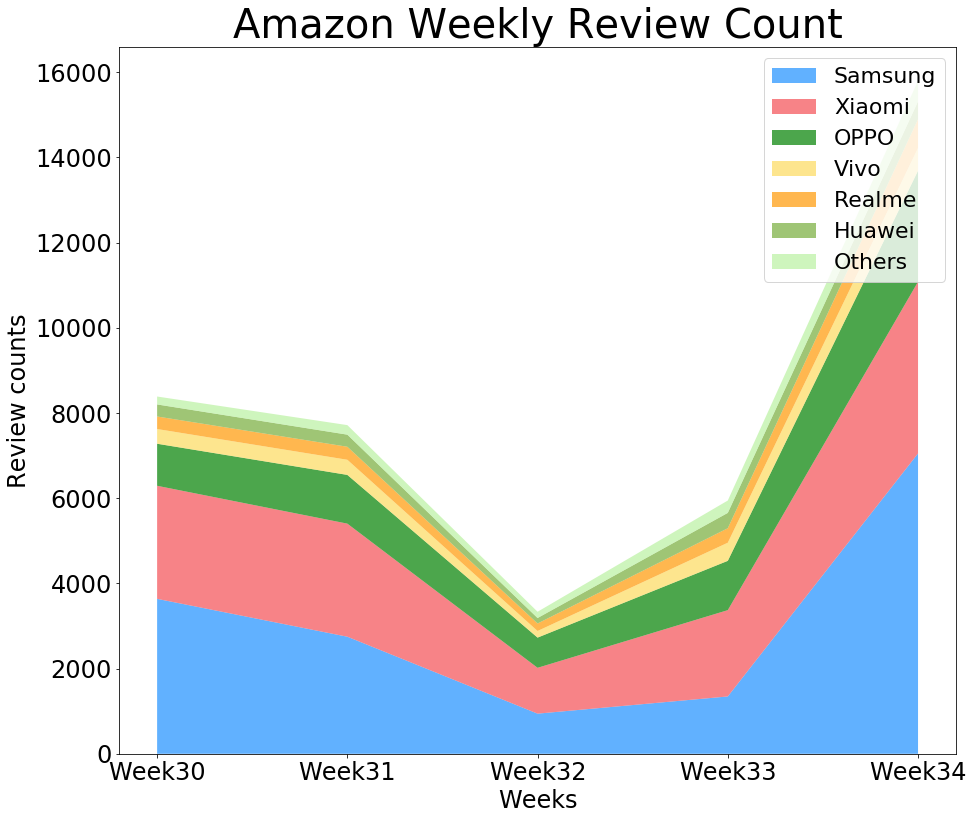

In [27]:
x= A_vendor_weigh3_review_count.columns[0:]
y=  A_vendor_weigh3_review_count[0:]

pal = ['dodgerblue','#F44E54', 'green' , '#FDDB5E' , '#FF9904', '#76AD3B','#BAF1A1']
plt.stackplot(x,y, labels=['Samsung', 'Xiaomi', 'OPPO', 'Vivo', 'Realme', 'Huawei', 'Others'], 
              colors=pal, alpha=0.7 )

plt.title("Amazon Weekly Review Count", fontsize=40, fontweight=0, color='black')
plt.xlabel("Weeks", fontsize = 24)
plt.xticks(fontsize = 24)

plt.ylabel("Review counts", fontsize = 24)
plt.yticks(fontsize = 24)

plt.legend(loc='upper right', fontsize = 22)
plt.show()
 

In [ ]:
A_vendor_weigh3_review_count